# PCA Warmup
hell yeah

## Concepts

#### Give at least two reasons why one might use PCA.  Be sure to include discussion of what problem PCA solves and how.

In [ ]:

'''
- dimensionality reduction.  As the number of dimensions increases, things like
distance calculations become less and less effective.  As such, we want to 
implement techniques that let us achieve around the same level of results
as including the full feature set but with a reduced number of features.

- untangling multicollinearity.  We might want to ensure that none of our features
are correlated in order to eg ease the interpretation of our model's coefficients.  
We thus want to create a set of features containing as much information as possible
but linearly independent
'''

In [10]:

# Run as-is
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import pickle as pkl

with open('test_obj/X.pkl', 'rb') as f:
    X = pkl.load(f)

with open('test_obj/y.pkl', 'rb') as f:
    y = pkl.load(f)  

from test_scripts.test_class import Test
test = Test()

## Application

### PCA Exploration

#### Run the following steps
- TTS, `random_state` = 1

- Scale w/ StandardScaler

- For the full PCA transformation (ie, w/o specifying `n_components` number)
on `X_train`, store the explained variance ratio for each component 
in `evr`

- Graph `evr`

- Re-graph the first few components in order to focus on them (you'll see why)

How many principal components does it look like we should choose?

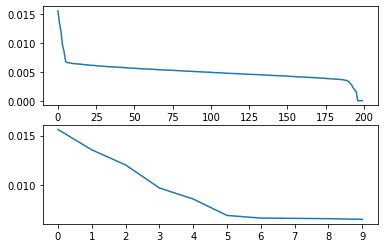

In [105]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
pca = PCA()
ss = StandardScaler()
X_train_scld = ss.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_scld)
cum_sum = pca.explained_variance_ratio_.cumsum()
evr = pca.explained_variance_ratio_
fig, ax = plt.subplots(2)
ax[0].plot(range(0,len(evr)), evr)
ax[1].plot(range(0,len(evr[:10])), evr[:10])
ax[1].set_xticks(range(0,len(evr[:10])))
plt.show();

### Calculate Train and Test Error

#### Run the following:
- for the first 50 principal components,
  - scale the data
  - generate the number of principal components and transform them into features
  - generate train and test predictions through 10-fold cross validation
    - *Hint:* use `sklearn.cross_validate`
    - *Level up:* ideally, you would scale and PCA on each training fold (why?).  Use a pipeline!
  - graph the means of the train and test predictions for each number of principal component

#### Interpret the graph  
- How many principle components should we choose based on this?
- Is overfitting or underfitting a problem?

#### Level up
- Repeat the above but don't scale the data.  Intepret the results.

In [99]:

train_scores = []
test_scores = []

for n in range(1,50):
    pipe_all = [('scale', StandardScaler()), ('pca', PCA(n_components=n)), ('m', LogisticRegression())]

    model = Pipeline(steps=pipe_all)
    results = cross_validate(model, X_train, y_train, scoring='f1_macro', cv=10, return_train_score=True, )

    train_score = np.mean(results['train_score'])
    test_score = np.mean(results['test_score'])
    
    train_scores.append(train_score)
    test_scores.append(test_score)

fig, ax = plt.subplots(figsize=(25,10))
ax.plot(range(1, len(train_scores)+1), train_scores, label="train")
ax.plot(range(1, len(test_scores)+1), test_scores, label="test")
ax.legend()
ax.set_xticks(range(1, len(train_scores)+1))
plt.show()

print('''
We should choose around 6 principle components, since that's when the gains in f1_score start
to level off and overfitting starts being introduced 
''')

train_scores = []
test_scores = []

for n in range(1,50):
    pipe_pca = [('pca', PCA(n_components=n)), ('m', LogisticRegression())]

    model = Pipeline(steps=pipe_pca)
    results = cross_validate(model, X_train, y_train, scoring='f1_macro', cv=10, return_train_score=True, )

    train_score = np.mean(results['train_score'])
    test_score = np.mean(results['test_score'])
    
    train_scores.append(train_score)
    test_scores.append(test_score)

fig, ax = plt.subplots(figsize=(25,10))
ax.plot(range(1, len(train_scores)+1), train_scores, label="train")
ax.plot(range(1, len(test_scores)+1), test_scores, label="test")
ax.legend()
ax.set_xticks(range(1, len(train_scores)+1))
plt.show()

print('''
    The latter principal components incorporate more and more distance 
    between train error and test error as the scaling problem becomes
    worse and worse.  This results in worse and worse overfitting.
''')